In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from keras.constraints import maxnorm
from keras.utils import np_utils

In [65]:
from sklearn.cluster import KMeans

In [70]:
train = pd.read_csv('ntrain.csv')
X_train = train.drop('target', axis=1)
y_train = train['target']
y_train = pd.get_dummies(y_train)

In [79]:
def build_model():
    model = Sequential()
    
    model.add(Dense(input_dim=51, output_dim=512, init='normal'))
    model.add(Activation('relu'))
    model.add(Dropout(.10))
    
    for i in range(0, 16):
        model.add(Dense(1024, init='normal'))
        model.add(Activation('relu'))
        model.add(Dropout(.10))
    
    model.add(Dense(output_dim=2, init='normal'))
    model.add(Activation('softmax'))
    
    optim = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optim)
    
    return(model)

In [80]:
model = build_model()

In [74]:
kmeans = KMeans(n_clusters=10).fit(X_train.values)
X_train['cluster'] = kmeans.labels_

In [75]:
X_train.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature42,feature43,feature44,feature45,feature46,feature47,feature48,feature49,feature50,cluster
0,0.298295,0.590668,0.710308,0.593777,0.654382,0.737973,0.338155,0.612782,0.364180,0.539625,...,0.359835,0.264163,0.566727,0.679851,0.485877,0.649007,0.451214,0.753195,0.503099,5
1,0.246636,0.256348,0.481008,0.522878,0.559398,0.412853,0.420271,0.644242,0.204365,0.463714,...,0.563404,0.712611,0.363641,0.684906,0.478391,0.412147,0.387372,0.232860,0.521463,2
2,0.614052,0.283110,0.377075,0.322318,0.577315,0.395441,0.508077,0.638552,0.402667,0.602424,...,0.549626,0.382534,0.194832,0.545327,0.706747,0.536792,0.415773,0.350660,0.457177,7
3,0.498020,0.652958,0.513329,0.310274,0.272216,0.556517,0.414643,0.508278,0.560960,0.342141,...,0.474071,0.612397,0.525800,0.260547,0.516413,0.489979,0.416072,0.179659,0.371790,3
4,0.293388,0.492028,0.524065,0.707898,0.642097,0.594946,0.430042,0.496973,0.362412,0.500920,...,0.447303,0.400248,0.775230,0.636218,0.495646,0.474609,0.598847,0.747557,0.498411,5


In [81]:
history = model.fit(X_train.values, y_train.values, nb_epoch=20, batch_size=256, verbose=2, validation_split=0.25)

Train on 130383 samples, validate on 43461 samples
Epoch 1/20
25s - loss: 0.7206 - acc: 0.5006 - val_loss: 0.6931 - val_acc: 0.5013
Epoch 2/20
24s - loss: 0.6964 - acc: 0.5010 - val_loss: 0.6947 - val_acc: 0.5001
Epoch 3/20
24s - loss: 0.6949 - acc: 0.4975 - val_loss: 0.6934 - val_acc: 0.5001
Epoch 4/20
24s - loss: 0.6942 - acc: 0.4983 - val_loss: 0.6934 - val_acc: 0.5001
Epoch 5/20
24s - loss: 0.6939 - acc: 0.5011 - val_loss: 0.6932 - val_acc: 0.5013
Epoch 6/20
24s - loss: 0.6936 - acc: 0.4994 - val_loss: 0.6935 - val_acc: 0.4999
Epoch 7/20
24s - loss: 0.6936 - acc: 0.5004 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 8/20
24s - loss: 0.6936 - acc: 0.4977 - val_loss: 0.6933 - val_acc: 0.4999
Epoch 9/20
24s - loss: 0.6934 - acc: 0.4994 - val_loss: 0.6934 - val_acc: 0.5001
Epoch 10/20
24s - loss: 0.6933 - acc: 0.5008 - val_loss: 0.6932 - val_acc: 0.4999
Epoch 11/20
24s - loss: 0.6934 - acc: 0.4990 - val_loss: 0.6933 - val_acc: 0.4999
Epoch 12/20
24s - loss: 0.6933 - acc: 0.5009 - val_loss:

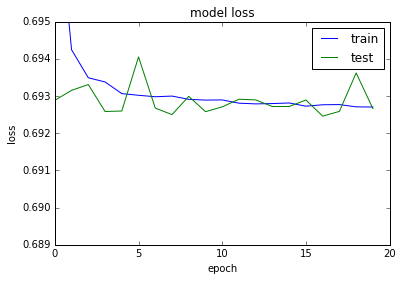

In [55]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.ylim(0.689,0.695)
plt.show()

In [56]:
submit_data = pd.read_csv('ntest.csv')
submit_data.shape

(264865, 51)

In [57]:
submission = pd.DataFrame()
submission['t_id'] = submit_data['t_id']

In [58]:
X_pred = submit_data.drop('t_id', axis=1)

In [59]:
X_pred.shape

(264865, 50)

In [60]:
prob = model.predict(X_pred.values)

In [61]:
submission['probability'] = pd.DataFrame(prob[:,1])

In [62]:
submission.describe()

,t_id,probability
count,264865.000000,264865.000000
mean,132432.000000,0.503054
std,76460.083862,0.009111
min,0.000000,0.491431
25%,66216.000000,0.498303
50%,132432.000000,0.498698
75%,198648.000000,0.503846
max,264864.000000,0.571247


In [63]:
submission.to_csv('sub_2.csv', index=False)